# Fashion Mnist 

## 1. Adjusting the data

### 1.1 Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
df_train= pd.read_csv('fashion-mnist_train.csv')
df_test= pd.read_csv('fashion-mnist_test.csv')

In [3]:
print("The shape of the training data:") 
print(df_train.shape)
print("First 5 rows of the training data:")
df_train.head()

The shape of the training data:
(60000, 785)
First 5 rows of the training data:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("The shape of the testing data:") 
print(df_test.shape)
print("first 5 rows of the testing data:")
df_test.head()

The shape of the testing data:
(10000, 785)
first 5 rows of the testing data:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Data normalization - each pixel will be in the range of 0 to 1
#df_train_nor=df_train/255
#df_test_nor=df_test/255

In [6]:
#train = np.array(df_train)
#test = np.array(df_train)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
##labels means:
# 0-T-shirt/top
# 1-Trouser
# 2-Pullover
# 3-Dress
# 4-Coat
# 5-Sandal
# 6-Shirt
# 7-Sneaker
# 8-Bag
# 9-Ankle boot

### 1.2 Checking the Data

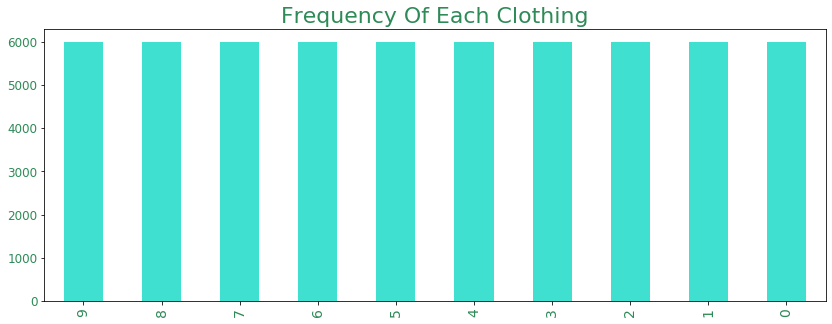

In [9]:
# Cheacking frequency of each clothing item in training and validation set:

count_categories= df_train['label'].value_counts()
count_categories.plot(kind='bar', figsize=(14,5),facecolor='turquoise')
plt.xticks(fontsize=14,color="seagreen"); plt.yticks(fontsize=12, color='seagreen')
plt.title("Frequency Of Each Clothing", fontsize=22, color="seagreen")   

plt.show() 
  
  

In [10]:
#clothing_item=train[0]
#print(class_names[clothing_item[0]]+":")
#pic_clothing_item=clothing_item[1:].reshape(28,28)
#plt.imshow(pic_clothing_item, cmap = "binary")
#plt.axis()
#plt.show()



In [11]:
#df_train/255

## 2. Train and Test Split

In [12]:
# split the testing dataset and the training dataset into X and y.
# Then we scale the data between 0-1
X_train, y_train = ((df_train[df_train.columns[:-1]].values)/255, df_train["label"].values)
X_test,  y_test=((df_test[df_test.columns[:-1]].values)/255, df_test["label"].values)

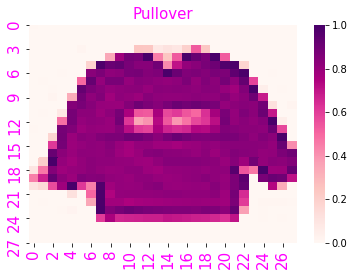

In [13]:
#Example from the data set
plt.title(class_names[y_train[0]],fontsize=15, color="magenta")
plt.xticks(fontsize=15,color="magenta")
plt.yticks(fontsize=15, color='magenta')
sns.heatmap(X_train[0].reshape(28, 28), cmap='RdPu')


In [14]:
# Explanation of the picture:
#Light color indicates that the pixel importance is low, you can see that the pixels in the frame are of lower importance.
#In contrast, because the goal is to predict the type of garment, the pixels depicting the shirt are of higher 
#importance and therefore darker.

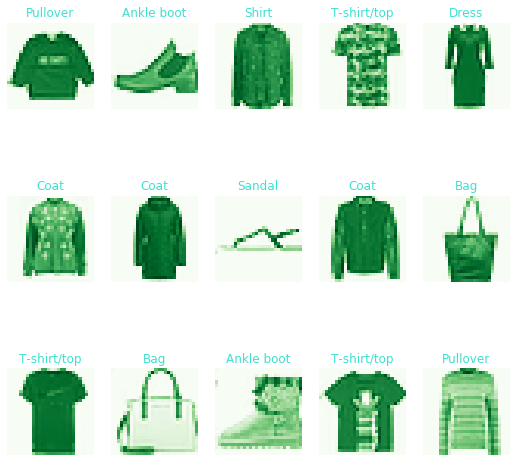

In [15]:
#An example of any item of clothing
fig, ax = plt.subplots(3,5 ,figsize=(15,15))
fig.set_size_inches(9,9)
for i in range(15):
    ax[i//5, i%5].imshow(X_train[i].reshape(28, 28),cmap='Greens')
    ax[i//5, i%5].set_title(class_names[y_train[i]],fontsize=12, color='turquoise')
    ax[i//5, i%5].axis('off')
plt.show()


## 3. Using PCA Algorithm

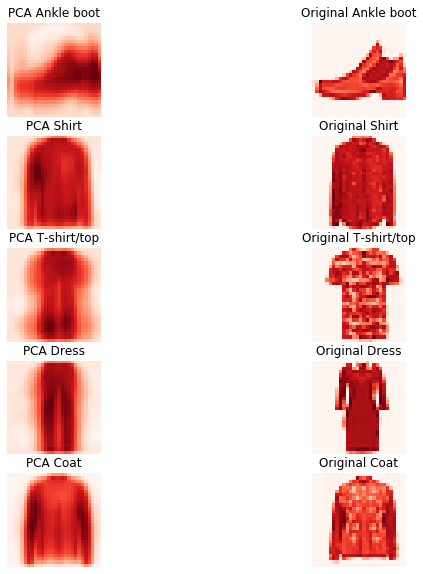

In [16]:
for i in range (1,6):
    pca_i=PCA(n_components=i)
    X_train_i = pca_i.fit_transform(X_train)
    X_reduced_i=pca_i.inverse_transform(X_train_i)
    
fig, ax = plt.subplots(5,2 ,figsize=(20,20))
fig.set_size_inches(10,10)
for i in range (1,6):
        ax[i-1,0].imshow(X_reduced_i[i].reshape(28, 28),cmap='Reds')
        ax[i-1,0].set_title( "PCA " +class_names[y_train[i]])
        ax[i-1,1].imshow(X_train[i].reshape(28, 28),cmap='Reds')
        ax[i-1,1].set_title('Original '+class_names[y_train[i]],fontsize=12)
        ax[i-1,0].set_aspect('equal')
        ax[i-1,1].set_aspect('equal')
        ax[i-1,0].axis('off')
        ax[i-1,1].axis('off')
plt.show()

In [17]:
#Find the minimum number of dimensions that will explain at least 95 percent of the variance:
pca = PCA(0.9)
X_train_p=pca.fit(X_train)
print(pca.n_components_)

84


In [18]:
pca.explained_variance_ratio_


array([0.29011355, 0.17727738, 0.06022703, 0.04970267, 0.03839292,
       0.03470998, 0.02344042, 0.01913936, 0.01343606, 0.01310724,
       0.0098979 , 0.0091405 , 0.00765205, 0.00660426, 0.00609187,
       0.00591505, 0.00552046, 0.0053049 , 0.00459958, 0.00455535,
       0.00432823, 0.00406102, 0.0038347 , 0.00374221, 0.00361877,
       0.00350909, 0.00333586, 0.00318696, 0.00309619, 0.00295278,
       0.00276008, 0.00265339, 0.00262962, 0.0025768 , 0.0024756 ,
       0.00238413, 0.00230075, 0.0022435 , 0.00219127, 0.00209739,
       0.00200786, 0.00197572, 0.00194213, 0.00183776, 0.00175782,
       0.00171549, 0.00168051, 0.00163924, 0.00162221, 0.00156039,
       0.00153962, 0.00150808, 0.00147632, 0.00142855, 0.00138375,
       0.00137028, 0.00130995, 0.00129031, 0.00127057, 0.00126083,
       0.00122874, 0.00120787, 0.00118019, 0.00116346, 0.0011529 ,
       0.0011201 , 0.00111493, 0.00109534, 0.00106029, 0.00104935,
       0.00103992, 0.0010226 , 0.00097369, 0.0009554 , 0.00093

Text(0.5, 1.0, 'Explained Variance Ratio')

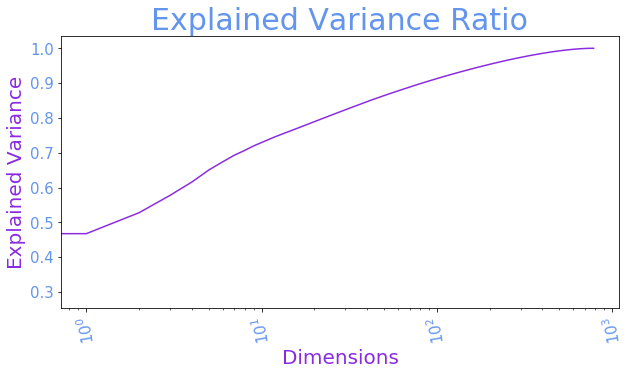

In [19]:
#This can also be seen using the following graph:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.yscale('linear')
plt.xscale('log')  # make log scale
#plt.yscale('linear')
plt.plot(cumsum, label='linear', color='blueviolet')
plt.xlabel('Dimensions', fontsize=20, color='blueviolet')
plt.ylabel('Explained Variance', fontsize=20, color='blueviolet')
plt.xticks(fontsize=15,color="cornflowerblue",rotation=100)
plt.yticks(fontsize=15, color='cornflowerblue')
plt.title('Explained Variance Ratio',fontsize=30, color="cornflowerblue")

In [20]:
#Set the number of dimensions to the nearest square number to 187
pca = PCA(n_components=0.9)
X_train_p = pca.fit_transform(X_train)
X_test_p=pca.transform(X_test)

In [21]:
#new shape
print(X_train_p.shape)
print(X_test_p.shape)

(60000, 84)
(10000, 84)


In [22]:
#decompress back to 784 dimensions
X_reduced=pca.inverse_transform(X_train_p)

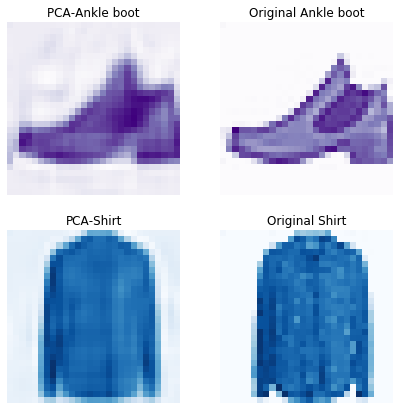

In [23]:
#shows a clothing items from the original training set, on the left,
#and the corresponding clothing items after compression and decompression
fig, ax = plt.subplots(2,2 ,figsize=(15,15))
fig.set_size_inches(7,7)
ax[0,0].imshow(X_reduced[1].reshape(28, 28), cmap='Purples')
ax[0,1].imshow(X_train[1].reshape(28, 28), cmap='Purples')
ax[1,0].imshow(X_reduced[2].reshape(28, 28), cmap='Blues')
ax[1,1].imshow(X_train[2].reshape(28, 28), cmap='Blues')
ax[0,0].set_title('PCA-'+class_names[y_train[1]],fontsize=12)
ax[0,1].set_title('Original '+class_names[y_train[1]],fontsize=12)
ax[1,0].set_title('PCA-'+class_names[y_train[2]],fontsize=12)
ax[1,1].set_title('Original '+class_names[y_train[2]],fontsize=12)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
plt.show()

## 4. Models

### 4.1 AdaBoost Algorithm

4.1.1 Cross Validation

In [24]:
clf_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=50,algorithm="SAMME.R", learning_rate=0.5)
scores_1 = cross_val_score(clf_1, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_1)
print(scores_1.mean())

[0.6102 0.6501 0.6718 0.6624 0.6214 0.6221]
0.6396666666666667


In [25]:
clf_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100,algorithm="SAMME.R", learning_rate=0.5)
scores_2 = cross_val_score(clf_2, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_2)
print(scores_2.mean())

[0.6943 0.708  0.6927 0.71   0.7137 0.6891]
0.7012999999999999


In [26]:
clf_3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=100,algorithm="SAMME.R", learning_rate=0.5)
scores_3 = cross_val_score(clf_3, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_3)
print(scores_3.mean())

[0.8236 0.816  0.8183 0.8237 0.8182 0.8168]
0.8194333333333333


In [27]:
clf_4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=300,algorithm="SAMME.R", learning_rate=0.5)
scores_4 = cross_val_score(clf_4, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_4)
print(scores_4.mean())

[0.8598 0.8588 0.8604 0.862  0.8594 0.8549]
0.8592166666666666


4.1.2 Fitting The Best Model

In [28]:
#fitting
clf_4.fit(X_train_p, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=12,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

4.1.3 Testing The Model

In [29]:
#predict
predictions_ada = clf_4.predict(X_test_p)

In [30]:
##confusion matrix
print(confusion_matrix(y_test, predictions_ada))
print(classification_report(y_test,predictions_ada))

[[805   0   6  28   0   2 147   0  12   0]
 [  2 944   8  26   1   0  19   0   0   0]
 [  7   0 756   5 102   0 125   0   5   0]
 [ 29   1   4 890  23   0  53   0   0   0]
 [  0   0  71  28 805   0  92   0   4   0]
 [  1   0   0   1   0 916   3  49   8  22]
 [128   0  81  21  61   0 700   0   9   0]
 [  0   0   0   0   0  27   1 917   1  54]
 [  0   0   4   5   4   8  28   1 949   1]
 [  0   0   0   0   0  17   1  41   1 940]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       1.00      0.94      0.97      1000
           2       0.81      0.76      0.78      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.81      0.81      1000
           5       0.94      0.92      0.93      1000
           6       0.60      0.70      0.65      1000
           7       0.91      0.92      0.91      1000
           8       0.96      0.95      0.95      1000
           9       0.92     


### 4.2 Bagging Classifier Algorithm

4.2.1 Cross Validation

In [35]:
# bagging algorithm
bag_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=100,bootstrap=True, n_jobs=-1)
scores_bag1 = cross_val_score(bag_clf1, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_bag1)
print(scores_bag1.mean())

[0.7702 0.7696 0.7768 0.7835 0.778  0.7651]
0.7738666666666667


In [24]:
bag_clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=100,bootstrap=True, n_jobs=-1)
scores_bag2 = cross_val_score(bag_clf2, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_bag2)
print(scores_bag2.mean())


[0.831  0.8228 0.8289 0.8252 0.8228 0.8188]
0.8249166666666667


4.2.2 Fitting The Best Model

In [25]:
#fitting 
bag_clf2.fit(X_train_p, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=12,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

4.2.3 Testing The Model

In [27]:
#predict
predictions_bag = bag_clf2.predict(X_test_p)

In [28]:
#confusion matrix
print(confusion_matrix(y_test, predictions_bag))
print(classification_report(y_test,predictions_bag))

[[818   2  24  41   4   4  96   0  10   1]
 [  7 945  11  28   2   1   6   0   0   0]
 [ 14   0 755   9 135   4  67   0  16   0]
 [ 33  13  14 880  28   1  29   0   2   0]
 [  1   1 107  43 764   1  72   0  11   0]
 [  1   0   4   3   0 882   1  67  10  32]
 [183   1 138  37 112   3 511   0  15   0]
 [  0   0   0   0   0  57   0 871   2  70]
 [  3   0  27   6  17  19  12   5 907   4]
 [  0   0   0   1   1  25   0  44   3 926]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.98      0.94      0.96      1000
           2       0.70      0.76      0.73      1000
           3       0.84      0.88      0.86      1000
           4       0.72      0.76      0.74      1000
           5       0.88      0.88      0.88      1000
           6       0.64      0.51      0.57      1000
           7       0.88      0.87      0.88      1000
           8       0.93      0.91      0.92      1000
           9       0.90     

### 4.3 Logistic Regression Algorithm

4.3.1 Cross Validation

In [29]:
#LogisticRegression algorithm
clf1_Log= LogisticRegression(solver='sag',C=0.1, multi_class='multinomial')
scores_Log1 = cross_val_score(clf1_Log, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_Log1)
print(scores_Log1.mean())


C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.8487 0.8453 0.8457 0.8443 0.8457 0.8447]
0.8457333333333334


C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
clf2_Log= LogisticRegression(solver='sag',C=0.2, multi_class='multinomial')
scores_Log2 = cross_val_score(clf2_Log, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_Log2)
print(scores_Log2.mean())

C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\sit

[0.8497 0.8469 0.8466 0.8437 0.8456 0.8451]
0.8462666666666667


C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [31]:
clf3_Log= LogisticRegression(solver='saga')
scores_Log3 = cross_val_score(clf3_Log, X_train_p, y_train, cv=6, scoring="accuracy")
print(scores_Log3)
print(scores_Log3.mean())

C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[0.8458 0.8385 0.8406 0.841  0.8401 0.8382]
0.8406999999999999


4.3.2 Fitting The Best Model

In [32]:
clf3_Log.fit(X_train_p, y_train)

C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\97254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

4.3.3 Testing The Model

In [33]:
predictions_Log= clf3_Log.predict(X_test_p)

In [34]:
#confusion matrix
print(confusion_matrix(y_test, predictions_Log))
print(classification_report(y_test,predictions_Log))

[[809   2  16  58   1   3  88   0  23   0]
 [  2 969   7  15   1   2   3   1   0   0]
 [  9   4 756   7 129   0  81   0  14   0]
 [ 36  26  16 875  22   0  24   0   1   0]
 [  2   1  78  35 800   1  81   0   2   0]
 [  3   1   0   1   0 916   1  52   9  17]
 [172   4 116  48  79   1 556   0  24   0]
 [  0   0   0   0   0  40   0 912   1  47]
 [  3   0   5  14   4  10  21   5 936   2]
 [  0   0   0   0   0  20   0  37   1 942]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.96      0.97      0.97      1000
           2       0.76      0.76      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.77      0.80      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.65      0.56      0.60      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.93     